<a href="https://colab.research.google.com/github/staocube88/AI-Model-Training/blob/master/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [54]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

In [55]:
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [56]:
df.describe()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [57]:
df.drop('Class', axis=1).corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Perimeter', ylabel='Area'>,
        <Axes: xlabel='Major_Axis_Length', ylabel='Area'>,
        <Axes: xlabel='Minor_Axis_Length', ylabel='Area'>,
        <Axes: xlabel='Eccentricity', ylabel='Area'>,
        <Axes: xlabel='Convex_Area', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Perimeter'>,
        <Axes: xlabel='Perimeter', ylabel='Perimeter'>,
        <Axes: xlabel='Major_Axis_Length', ylabel='Perimeter'>,
        <Axes: xlabel='Minor_Axis_Length', ylabel='Perimeter'>,
        <Axes: xlabel='Eccentricity', ylabel='Perimeter'>,
        <Axes: xlabel='Convex_Area', ylabel='Perimeter'>],
       [<Axes: xlabel='Area', ylabel='Major_Axis_Length'>,
        <Axes: xlabel='Perimeter', ylabel='Major_Axis_Length'>,
        <Axes: xlabel='Major_Axis_Length', ylabel='Major_Axis_Length'>,
        <Axes: xlabel='Minor_Axis_Length', ylabel='Major_Axis_Length'>,
        <Axes: xlabel='Eccentricity', ylabel='Major_Axis_

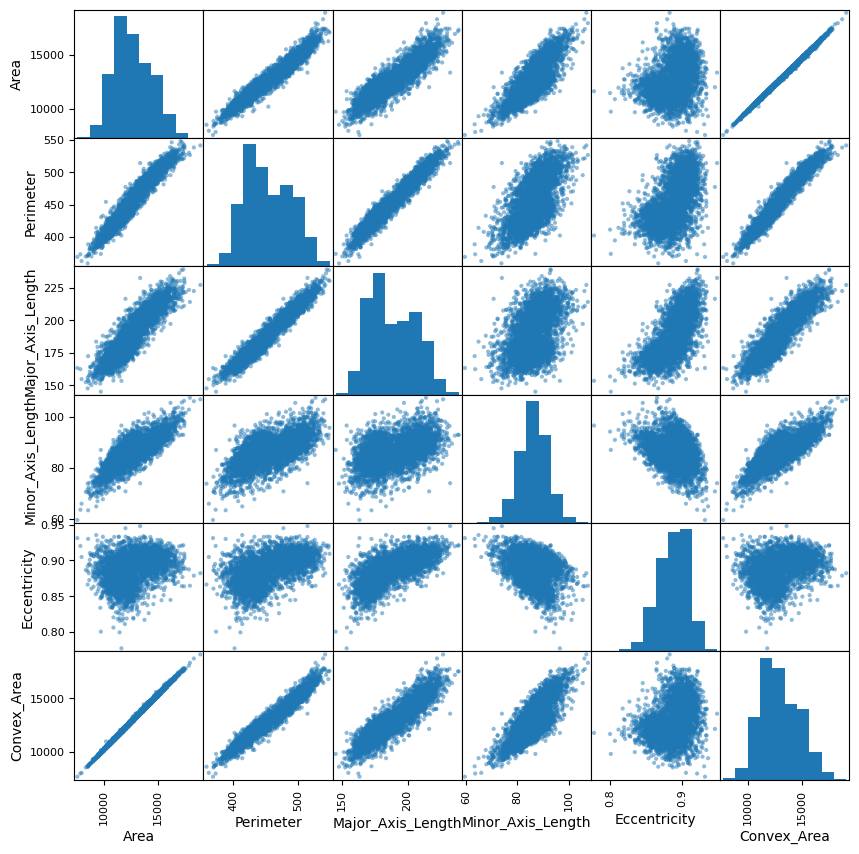

In [58]:
pd.plotting.scatter_matrix(df.iloc[:,:-2], figsize=(10,10))

In [59]:
for x_axis_data, y_axis_data in [
    ('Area', 'Eccentricity'),
    ('Convex_Area', 'Perimeter'),
    ('Major_Axis_Length', 'Minor_Axis_Length'),
    ('Perimeter', 'Extent'),
    ('Eccentricity', 'Major_Axis_Length'),
]:

  px.scatter(df, x=x_axis_data, y=y_axis_data, color='Class').show()

In [60]:
px.scatter_3d(
    df, x='Area',
    y='Perimeter',
    z='Major_Axis_Length',
    color='Class'
).show()



In [61]:
df = df[['Area', 'Perimeter', 'Convex_Area', 'Major_Axis_Length',
        'Minor_Axis_Length',
        'Eccentricity',
        'Class']]



Split Data

In [62]:
train_dataset, test_dataset = train_test_split(df, test_size=0.1)
X_train = train_dataset.drop('Class', axis=1)
y_train = train_dataset['Class']
X_test = test_dataset.drop('Class', axis=1)
y_test = test_dataset['Class']

Label Encoding

In [63]:

label_encoder =LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Define Model Pipeline

In [64]:
model_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

Train Model

In [65]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

Evaluate Model

In [66]:
y_prod = model_pipe.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_prod)
print(f"Accuracy: {accuracy}")

Accuracy: 0.937007874015748


Accuracy


Confusion Matrix

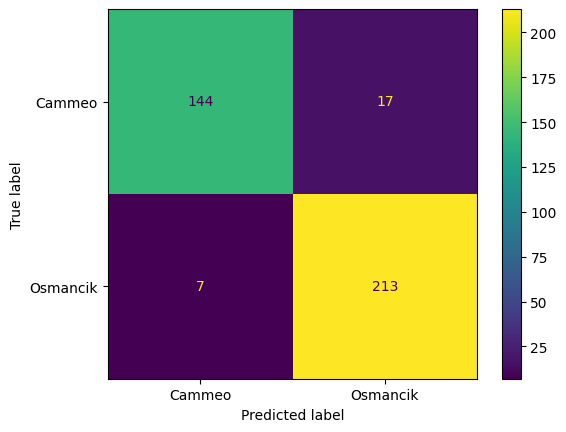

In [68]:
cm = confusion_matrix(y_test, y_prod)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()